In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv('./data.csv')
df.head(20)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               193 non-null    object 
 1   fuel-type          193 non-null    object 
 2   aspiration         193 non-null    object 
 3   num-of-doors       193 non-null    object 
 4   body-style         193 non-null    object 
 5   drive-wheels       193 non-null    object 
 6   engine-location    193 non-null    object 
 7   wheel-base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb-weight        193 non-null    int64  
 12  engine-type        193 non-null    object 
 13  num-of-cylinders   193 non-null    object 
 14  engine-size        193 non-null    int64  
 15  fuel-system        193 non-null    object 
 16  bore               193 non

In [3]:
df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df[df.columns[0:]].corr()['price'][:-1]

wheel-base           0.584951
length               0.695928
width                0.754649
height               0.136234
curb-weight          0.835368
engine-size          0.888778
bore                 0.546295
stroke               0.096007
compression-ratio    0.074483
horsepower           0.812453
peak-rpm            -0.103835
city-mpg            -0.706618
highway-mpg         -0.719178
Name: price, dtype: float64

<AxesSubplot:>

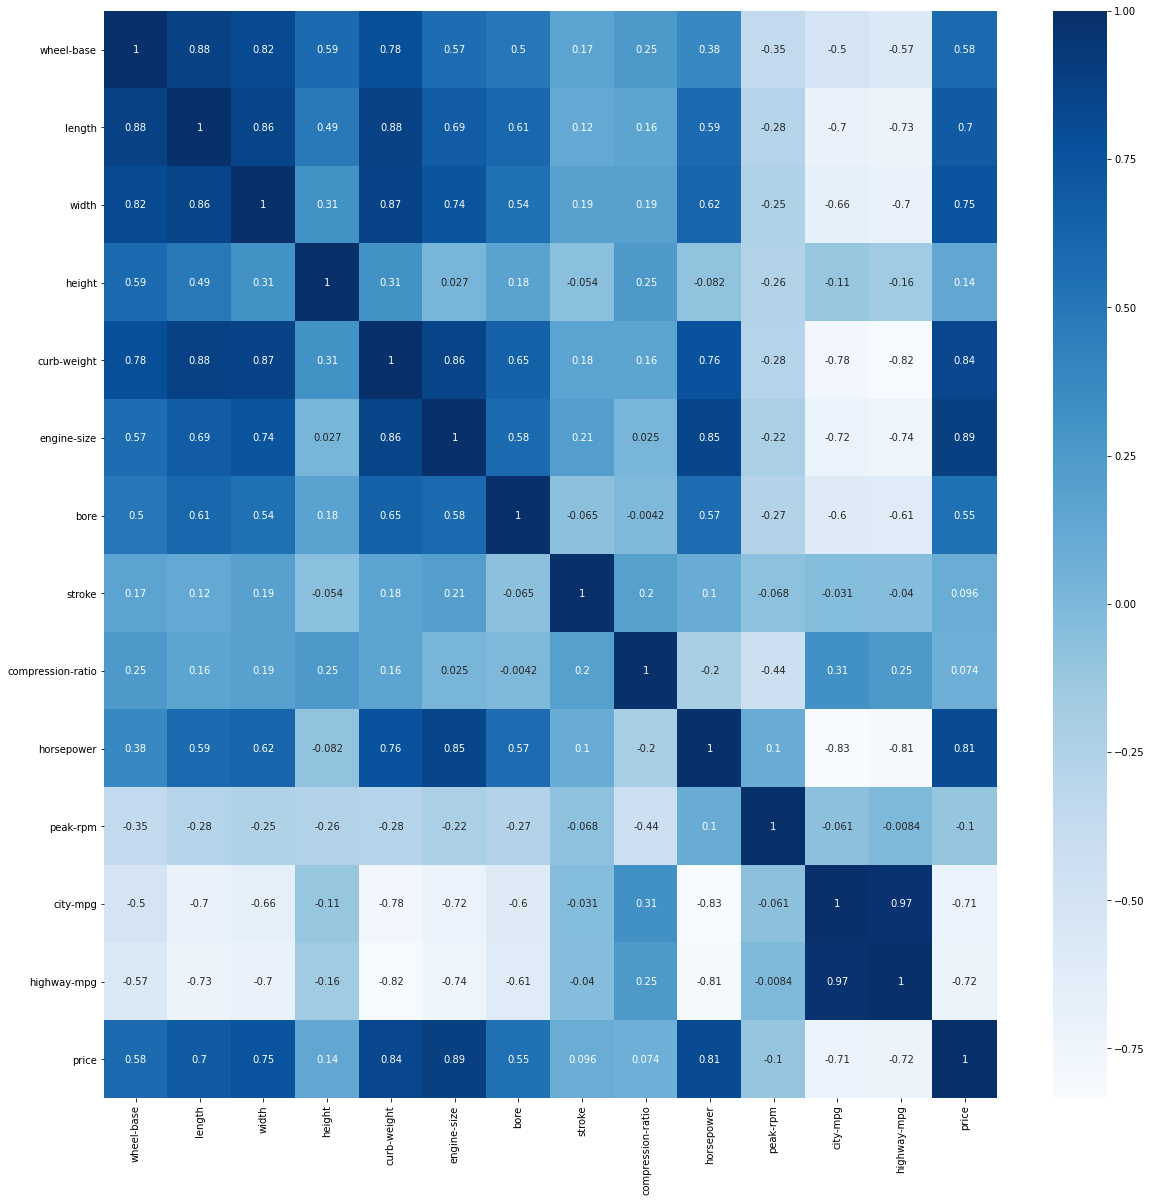

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [6]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,20,1,0,0,3,2,0,109.1,188.8,68.9,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845
189,20,1,1,0,3,2,0,109.1,188.8,68.8,...,141,4,3.78,3.15,8.7,160,5300,19,25,19045
190,20,1,0,0,3,2,0,109.1,188.8,68.9,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485
191,20,0,1,0,3,2,0,109.1,188.8,68.9,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
min_df = df.min()
max_df = df.max()

In [8]:
#Normalization Function
def normalization(var):
    global min_df , max_df
    var_minmax = var.columns
    return ((var - min_df[var_minmax]) / (max_df[var_minmax] - min_df[var_minmax]))
     

In [9]:
#Denormalization Function
def denormalization(var):
    global min_df , max_df
    var_minmax = var.columns
    return (var * max_df[var_minmax] - min_df[var_minmax] + min_df[var_minmax])

## With Normalization

In [10]:
y = df[['price']]
x = df.drop(y.columns, axis=1)

In [11]:
# we use our normalization function hear for normalize the features and label (THIS IS NOT ESSENTIAL)
y = normalization(y)
x = normalization(x)

In [12]:
# we need to split data in two parts for both train and test the model
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(154, 23) (39, 23) (154, 1) (39, 1)


In [13]:
regressor=LinearRegression()  
res_train = regressor.fit(x_train,y_train)  
print(res_train.predict(x.head()))

[[0.29005581]
 [0.29005581]
 [0.30618143]
 [0.18906561]
 [0.27677268]]


In [14]:
# this quantify the association between features of the dataset
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(res_train.coef_))], axis = 1)
coefficients.head()

,0,0
0,make,-0.088912
1,fuel-type,0.155076
2,aspiration,0.056827
3,num-of-doors,-0.006532
4,body-style,-0.060955


In [15]:
# this is a prediction sample of our model
y_predict = regressor.predict(x_test) 
# we need to calculate the error between real number and predicted one to see how good our model is
y_error = y_test - y_predict

In [16]:
# this is a metric for model evaluation
r2_score(y_test,y_predict)

0.9039629397377837

In [17]:
# we need to see the original results for understand how good they are so we need to denormalize them
#  (with denormalization function which is written above)

y_predict = pd.DataFrame(np.column_stack([y_predict]), columns=['price'])
y_predict = denormalization(y_predict)
y_test = denormalization(y_test)
y_error = denormalization(y_error)

In [18]:
# this is for show the results as a table and for the ease of read 
res = pd.DataFrame(np.column_stack([y_test, y_predict, y_error]), 
                               columns=['Real Price', 'prediction', 'Error'])
res.head()

,Real Price,prediction,Error
0,34298.515466,26466.402709,7832.112757
1,1748.061169,1847.328764,-99.267595
2,6288.962812,6646.116252,-357.153440
3,3129.829701,5204.303563,-2074.473862
4,9351.169257,12289.287931,-2938.118674


In [19]:
y_error = denormalization(y_error)

## Without Normalization

In [20]:
y = denormalization(y)
x = denormalization(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(154, 23) (39, 23) (154, 1) (39, 1)


In [22]:
regressor=LinearRegression()  
res_train = regressor.fit(x_train,y_train)  
print(res_train.predict(x.head()))

[[13334.05901542]
 [13334.05901542]
 [13794.52100419]
 [ 8858.83310465]
 [12551.55758812]]


In [23]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(res_train.coef_))], axis = 1)
coefficients.head()

,0,0
0,make,-268.194944
1,fuel-type,2115.080066
2,aspiration,2860.150122
3,num-of-doors,-1042.853498
4,body-style,-721.205614


In [24]:
y_predict = regressor.predict(x_test) 
y_error = y_test - y_predict

In [25]:
r2_score(y_test,y_predict)

0.8158937708696341

In [26]:
res = pd.DataFrame(np.column_stack([y_test, y_predict, y_error]), 
                               columns=['Real Price', 'prediction', 'Error'])
res.head()

,Real Price,prediction,Error
0,1773.983417,148.797739,1625.185678
1,13898.833226,12551.557588,1347.275638
2,9351.169257,12392.601494,-3041.432237
3,4689.672807,7337.164061,-2647.491254
4,14968.407726,15590.452474,-622.044748
